# Experiments for Section 4.2

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import math

# Hamming weights of numbers 0-15
HW = [0,1,1,2,1,2,2,3,1,2,2,3,2,3,3,4]

# PRESENT Sbox
S = [12,5,6,11,9,0,10,13,3,14,15,8,4,7,1,2]

In [2]:
#Load data from fixed dataset A
#Loading file_no_fixed traces to the variable traces_fixed and the corresponding plaintexts to the variable $\textit{plaintexts}$
file_no_fixed = 5000
traces_fixed = []
plaintexts_fixed = []

for i in range(file_no_fixed):
    with open('fixed_dataset_1/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_fixed.append(lines)

with open('fixed_dataset_1/plaintexts.txt') as f:
    plaintexts_fixed = f.read().splitlines()
    
trace_array_fixed = np.array(traces_fixed)
trace_array_fixed = trace_array_fixed.astype(float)
q = 5000 #number of time samples

In [94]:
#load data from fixed dataset B
file_no_fixed_2 = 5000
traces_fixed_2 = []
plaintexts_fixed_2 = []

for i in range(file_no_fixed_2):
    with open('fixed_dataset_2/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_fixed_2.append(lines)

with open('fixed_dataset_2/plaintexts.txt') as f:
    plaintexts_fixed_2 = f.read().splitlines()
    
trace_array_fixed_2 = np.array(traces_fixed_2)
trace_array_fixed_2 = trace_array_fixed_2.astype(float)

In [3]:
#Load data from the "random plaintext dataset"
file_no = 5000
traces = []
plaintexts = []

for i in range(file_no):
    with open('random_pt_dataset/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces.append(lines)

with open('random_pt_dataset/plaintexts.txt') as f:
    plaintexts = f.read().splitlines()
    
trace_array = np.array(traces)
trace_array = trace_array.astype(float)

#the 0th key nibble used for random plaintext dataset
correct_key = 9

#extract the plaintext nibble
plaintext_array = []
for i in range(file_no):
    plaintext_array.append(int(plaintexts[i][15],16))
plaintext_array = np.array(plaintext_array)


In [4]:
#Loading data from the random dataset
file_no_rk = 10000
traces_rk = []
plaintexts_rk = []
keys_rk = []

for i in range(file_no_rk):
    with open('random_dataset/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_rk.append(lines)

with open('random_dataset/plaintexts.txt') as f:
    plaintexts_rk = f.read().splitlines()

with open('random_dataset/keys.txt') as f:
    keys_rk = f.read().splitlines()

trace_array_rk = np.array(traces_rk)
trace_array_rk = trace_array_rk.astype(float)

#extract the plaintext nibble
plaintext_array_rk = []
for i in range(file_no_rk):
    plaintext_array_rk.append(int(plaintexts_rk[i][15],16))
plaintext_array_rk = np.array(plaintext_array_rk)


#extract the key nibble
keys_array_rk = []
for i in range(file_no_rk):
    keys_array_rk.append(int(keys_rk[i][15],16))
keys_array_rk = np.array(keys_array_rk)

In [5]:
#save data to file for tikz plot
def savetofile(filename,array):
    f = open(filename+".txt", "w")
    f.write("x y\n")
    i = 0
    for i in range(len(array)):
        f.write(str(i)+" "+str(array[i])+"\n")
        i+=1
    f.close()

In [11]:
def highest_tree_points(array):
    array_abs = [abs(a) for a in array]
    ind = np.argpartition(array_abs, -3)[-3:]
    print(ind)
    array_abs = np.array(array_abs)
    print(array_abs[ind])
    return

## Drawing histograms

In [22]:
#compute the averaged trace for Fixed dataset A
averaged = trace_array_fixed.mean(axis=0)

#save the averaged trace to file
savetofile("present1round_avg",averaged)

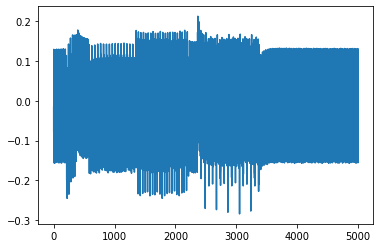

In [23]:
#Plot the averaged trace
plt.plot(averaged)
plt.show()

In [35]:
#print the histogram
def printHistogram(t,number_of_bins,traces):
    #Collect the data from each trace for the time sample t
    L = []
    sample_size = len(traces)
    for trace in range(sample_size):
        L.append(traces[trace][t])
    
    hist = np.histogram(L,bins=number_of_bins)
    i = 0
    for a in hist[0]:
        print("("+str(hist[1][i])+","+str(a)+")")
        i+=1
    return

In [36]:
#plot histogram for a given time sample and specified number of bins for the histogram
def plotHistogram(t,number_of_bins,traces):
    #Collect the data from each trace for the time sample t
    L = []
    sample_size = len(traces)
    for trace in range(sample_size):
        L.append(traces[trace][t])
    
    #plot histogram for a fixed time sample t
    plt.hist(L, bins=number_of_bins)
    plt.show()
    printHistogram(t,number_of_bins,traces)
    return

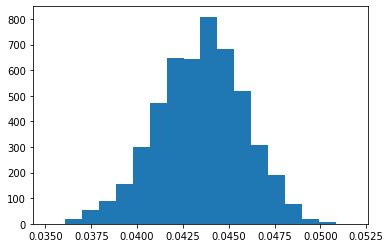

(0.03515625,1)
(0.036078559027777776,17)
(0.03700086805555555,55)
(0.037923177083333336,90)
(0.03884548611111111,155)
(0.03976779513888889,300)
(0.040690104166666664,473)
(0.04161241319444445,649)
(0.042534722222222224,645)
(0.04345703125,809)
(0.044379340277777776,683)
(0.04530164930555555,519)
(0.04622395833333333,306)
(0.04714626736111111,192)
(0.04806857638888889,77)
(0.048990885416666664,20)
(0.04991319444444445,8)
(0.050835503472222224,1)


In [84]:
#plot histogram for time sample t=3500, which corresponds to NOP operations
plotHistogram(3520,18,trace_array_fixed)

In [27]:
#find the maximum point in the averaged trace
max = 0
max_i = 0
for i in range(5000):
    if averaged[i]>max:
        max_i = i
        max = averaged[i]
    i+=1
print(str(max_i)+" "+str(averaged[max_i]))

2368 0.2132193359375


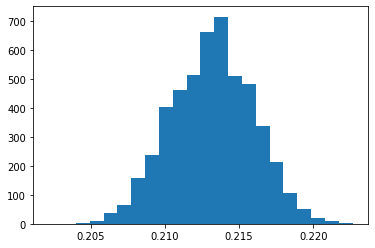

(0.2021484375,1)
(0.20308061079545456,0)
(0.2040127840909091,3)
(0.20494495738636365,10)
(0.20587713068181818,37)
(0.20680930397727273,64)
(0.20774147727272727,159)
(0.20867365056818182,239)
(0.20960582386363635,404)
(0.2105379971590909,462)
(0.21147017045454547,515)
(0.21240234375,661)
(0.21333451704545456,715)
(0.2142666903409091,510)
(0.21519886363636365,482)
(0.21613103693181818,337)
(0.21706321022727273,213)
(0.21799538352272727,107)
(0.21892755681818182,51)
(0.21985973011363635,19)
(0.2207919034090909,9)
(0.22172407670454547,2)


In [80]:
#plot histogram for time sample t=2368, which corresponds to the highest point in the average trace
plotHistogram(2368,22,trace_array_fixed)

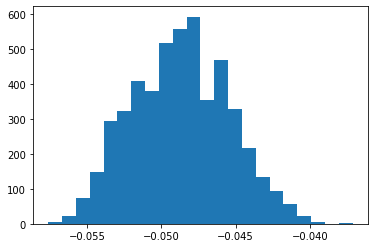

(-0.0576171875,4)
(-0.056685014204545456,23)
(-0.05575284090909091,75)
(-0.05482066761363636,147)
(-0.053888494318181816,295)
(-0.05295632102272727,323)
(-0.05202414772727273,409)
(-0.051091974431818184,380)
(-0.05015980113636363,517)
(-0.04922762784090909,558)
(-0.048295454545454544,592)
(-0.04736328125,354)
(-0.046431107954545456,467)
(-0.04549893465909091,328)
(-0.04456676136363637,216)
(-0.043634588068181816,134)
(-0.04270241477272727,93)
(-0.04177024147727273,57)
(-0.04083806818181818,21)
(-0.03990589488636363,6)
(-0.03897372159090909,0)
(-0.038041548295454544,1)


In [79]:
#plot histogram for time sample t=392 for random plaintext dataset
plotHistogram(392,22,trace_array)

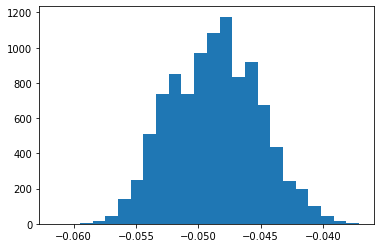

(-0.0615234375,1)
(-0.060506184895833336,0)
(-0.059488932291666664,4)
(-0.0584716796875,15)
(-0.057454427083333336,46)
(-0.056437174479166664,143)
(-0.055419921875,248)
(-0.054402669270833336,510)
(-0.053385416666666664,735)
(-0.0523681640625,852)
(-0.05135091145833333,739)
(-0.050333658854166664,969)
(-0.04931640625,1085)
(-0.04829915364583333,1176)
(-0.047281901041666664,836)
(-0.0462646484375,921)
(-0.04524739583333333,675)
(-0.044230143229166664,438)
(-0.043212890625,242)
(-0.04219563802083333,198)
(-0.041178385416666664,102)
(-0.0401611328125,46)
(-0.03914388020833333,14)
(-0.038126627604166664,5)


In [77]:
#plot histogram for time sample t=392 for random dataset
plotHistogram(392,24,trace_array_rk)

## Sample mean and sample variance computation

In [123]:
#compute mean and varaince given the sample
def computeMeanVar(L):
    #mean of L
    print("Mean of the sample is % s " %(statistics.mean(L))) 

    #variance of L
    print("Variance of the sample is % s " %(statistics.variance(L))) 
    return 

In [124]:
#Compute the sample mean and sample variance for leakages at time sample t=2368
#find all leakages at t=2368
t = 2368
Lt = []
for i in range(file_no_fixed):#for each leakage trace
    Lt.append(trace_array_fixed[i][t])
computeMeanVar(Lt)

Mean of the sample is 0.2132193359375 
Variance of the sample is 8.519637238910185e-06 


In [125]:
#Compute the sample mean and sample variance for leakages at time sample t=2368
#find all leakages at t=2368
t = 392
L392 = []
for i in range(file_no_fixed):#for each leakage trace
    L392.append(trace_array_fixed[i][t])
computeMeanVar(L392)

Mean of the sample is -0.05252890625 
Variance of the sample is 1.5141004275073765e-06 


In [126]:
#Compute the sample mean and sample variance for leakages at time sample t=2368 for fixed dataset B

#find all leakages at t
t = 2368
Lt_2 = []
for i in range(file_no_fixed_2):#for each leakage trace
    Lt_2.append(trace_array_fixed_2[i][t])

computeMeanVar(Lt_2)

Mean of the sample is 0.2133837890625 
Variance of the sample is 8.619864193480786e-06 


In [127]:
#Compute the sample mean and sample variance for leakages at time sample t=392 for fixed dataset B
#find all leakages at t
t = 392
L392_2 = []
for i in range(file_no_fixed_2):#for each leakage trace
    L392_2.append(trace_array_fixed_2[i][t])

computeMeanVar(L392_2)

Mean of the sample is -0.0500572265625 
Variance of the sample is 1.4801372979063586e-06 


In [128]:
#Compute the sample mean and sample variance for leakages at time sample t=392 for random plaintext dataset
t = 392
L392_r = []
for i in range(file_no):
    L392_r.append(trace_array[i][t])

computeMeanVar(L392_r)

Mean of the sample is -0.0487564453125 
Variance of the sample is 1.170012105295815e-05 


## TVLA

In [95]:
import scipy.stats as st
threshold = 4.5
alpha = 1-st.norm.cdf(threshold)
print("significance level = " + str(alpha))

significance level = 3.3976731247387093e-06


In [118]:
def TVLA(number_of_traces,trace_array1,trace_array2,filename):
    #compute the t-value for all time samples
    ind = [i for i in range(number_of_traces)]
    trace_1 = trace_array1[ind]
    trace_2 = trace_array2[ind]
    #sample means for dataset one and dataset two at each time sample
    mean1 = trace_1.mean(axis=0)
    mean2 = trace_2.mean(axis=0)
    print("sample mean for dataset one at POI=392: " + str(mean1[392]))
    print("sample mean for dataset two at POI=392: " + str(mean2[392]))
    meandif = mean1 - mean2
    numerator = np.multiply(meandif,np.sqrt(number_of_traces))
    
    #variance for leakages at each time sample
    var1 = trace_1.var(axis=0)
    var2 = trace_2.var(axis=0)
    #sample variance for dataset one and dataset two at each time sample
    scale = number_of_traces/(number_of_traces-1)#sample variance divide by sample_size -1 instead of sample_size
    var1 = np.multiply(var1,scale)
    var2 = np.multiply(var2,scale)
    print("sample variance for dataset one at POI=392: " + str(var1[392]))
    print("sample variance for dataset two at POI=392: " + str(var2[392]))
    tvla = []
    for t in range(q):
        tvalue = numerator[t]/np.sqrt(var1[t]+var2[t])
        tvla.append(tvalue)
    savetofile("TVLA/"+filename+str(number_of_traces),tvla)
    plt.plot(tvla)
    plt.show()
    print("highest three points")
    highest_tree_points(tvla)
    print("tvla at POI=392: " + str(tvla[392]))
    return

sample mean for dataset one at POI=392: -0.051953125
sample mean for dataset two at POI=392: -0.04931640625
sample variance for dataset one at POI=392: 6.228077168367354e-07
sample variance for dataset two at POI=392: 9.43942945830676e-07


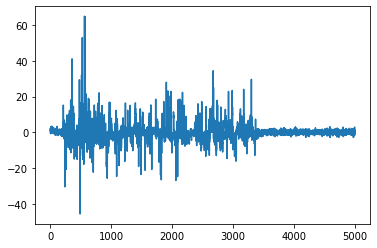

highest three points
[524 560 572]
[52.94995832 64.909775   64.48573966]
tvla at POI=392: -14.895286677919014


In [119]:
TVLA(50,trace_array_fixed,trace_array_fixed_2,"tvlafixed_")

sample mean for dataset one at POI=392: -0.05252890625
sample mean for dataset two at POI=392: -0.0500572265625
sample variance for dataset one at POI=392: 1.514100427507311e-06
sample variance for dataset two at POI=392: 1.4801372979063082e-06


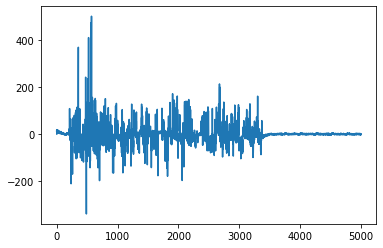

highest three points
[524 572 560]
[411.70137949 502.82954864 474.76808986]
tvla at POI=392: -101.00294844381902


In [120]:
TVLA(5000,trace_array_fixed,trace_array_fixed_2, "tvlafixed_")

sample mean for dataset one at POI=392: -0.051953125
sample mean for dataset two at POI=392: -0.0482421875
sample variance for dataset one at POI=392: 6.228077168367354e-07
sample variance for dataset two at POI=392: 1.3117887535873727e-05


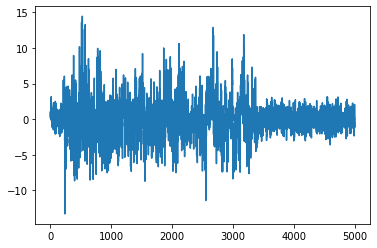

highest three points
[237 524 512]
[13.29691246 14.4564343  13.59092314]
tvla at POI=392: -7.078875728984255


In [121]:
TVLA(50,trace_array_fixed,trace_array, "tvlarandom_");

sample mean for dataset one at POI=392: -0.05252890625
sample mean for dataset two at POI=392: -0.0487564453125
sample variance for dataset one at POI=392: 1.514100427507311e-06
sample variance for dataset two at POI=392: 1.1700121052957991e-05


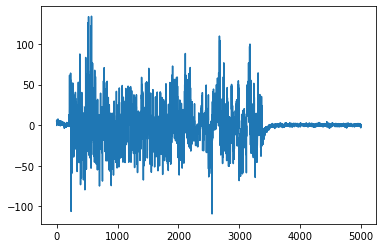

highest three points
[512 524 572]
[126.23705487 133.74988423 134.26819177]
tvla at POI=392: -73.38190178409614


In [122]:
TVLA(5000,trace_array_fixed,trace_array, "tvlarandom_")

In [135]:
#compute tvla, taking signal to be given by sbox output
#t-test: student's t-test or welch's t-test
    #ttest = 0 -- fixed vs fixed, we use student's t-test
    #ttest = 1 -- fixed vs random, we use welch's t-test
#M1 M2: number of samples in dataset one and dataset two. If equal to 0, then take all traces available
def tvla_sbox(filename,ttest,fixedvalue1,fixedvalue2,M1,M2):
    trace_1=[]
    trace_2=[]
    for j in range(file_no_rk):
        #compute the intermediate value of the 0th Sbox output corresponding to each trace
        v = S[plaintext_array_rk[j]^keys_array_rk[j]]
        if v == fixedvalue1:
            trace_1.append(trace_array_rk[j])
        elif ttest==0 and v == fixedvalue2:
            trace_2.append(trace_array_rk[j])
        if ttest == 1:
            trace_2.append(trace_array_rk[j])
    trace_1=np.array(trace_1)
    trace_2=np.array(trace_2)
    
     
    #number of samples in each set
    if M1 != 0:
        ind1 = [i for i in range(M1)]
        trace_1 = trace_1[ind1]
    else:
        M1 = len(trace_1)
    if M2 != 0:
        ind2 = [i for i in range(M2)]
        trace_2 = trace_2[ind2]
    else:
        M2 = len(trace_2)
    
    print("number of traces for dataset one: " + str(M1))
    print("number of traces for dataset two: " + str(M2))
    
    #sample means for dataset one and dataset two at each time sample
    mean1 = trace_1.mean(axis=0)
    mean2 = trace_2.mean(axis=0)
    print("sample mean for dataset one at POI=392: " + str(mean1[392]))
    print("sample mean for dataset two at POI=392: " + str(mean2[392]))
    
    meandif = mean1 - mean2
    #variance for leakages at each time sample
    var1 = trace_1.var(axis=0)
    var2 = trace_2.var(axis=0)
    #sample variance for dataset one and dataset two at each time sample
    scale1 = M1/(M1-1)#sample variance divide by sample_size -1 instead of sample_size
    scale2 = M2/(M2-1)#sample variance divide by sample_size -1 instead of sample_size
    var1 = np.multiply(var1,scale1)
    var2 = np.multiply(var2,scale2)
    print("sample variance for dataset one at POI=392: " + str(var1[392]))
    print("sample variance for dataset two at POI=392: " + str(var2[392]))
    
    tvla = []
    
    #student's t-test
    if ttest == 0:
        sp = np.multiply(var1,(M1-1)/(M1+M2-2))+np.multiply(var2,(M2-1)/(M1+M2-2))
        for t in range(q):
            tvalue = meandif[t]/np.sqrt(sp[t]*(1/M1+1/M2))
            tvla.append(tvalue)
    #welch's test
    if ttest == 1:
        denominator = np.multiply(var1,1/M1)+np.multiply(var2,1/M2)
        for t in range(q):
            tvalue = meandif[t]/np.sqrt(denominator[t])
            tvla.append(tvalue)
            
    savetofile("TVLA/"+filename+"_"+str(M1)+str(M2),tvla)
    plt.plot(tvla)
    plt.show()
    print("highest three points")
    highest_tree_points(tvla)
    print("tvla at POI=392: " + str(tvla[392]))
    return

number of traces for dataset one: 634
number of traces for dataset two: 651
sample mean for dataset one at POI=392: -0.042455823639589906
sample mean for dataset two at POI=392: -0.05390594998079877
sample variance for dataset one at POI=392: 2.2961949692119577e-06
sample variance for dataset two at POI=392: 2.7378374812141945e-06


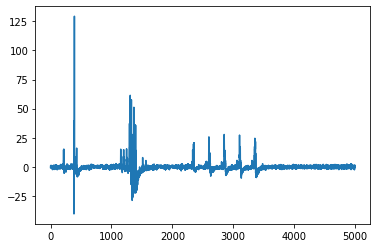

highest three points
[1328 1309  392]
[ 57.59137849  61.43028484 129.27023928]
tvla at POI=392: 129.27023928368283


In [136]:
#tvla, taking signal to be given by sbox output
#fixed vs fixed
tvla_sbox("sbox_student",0,0,15,0,0)

number of traces for dataset one: 50
number of traces for dataset two: 50
sample mean for dataset one at POI=392: -0.042109375
sample mean for dataset two at POI=392: -0.05392578125
sample variance for dataset one at POI=392: 2.5939941406249993e-06
sample variance for dataset two at POI=392: 2.0354134695870545e-06


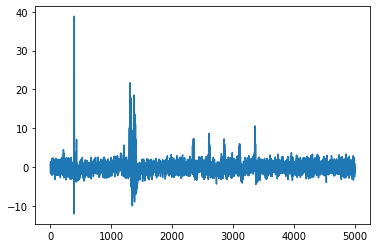

highest three points
[1369  392 1309]
[18.52090228 38.83360468 21.69971991]
tvla at POI=392: 38.83360467772776


In [137]:
#tvla, taking signal to be given by sbox output
#fixed vs fixed, less traces
tvla_sbox("sbox_student",0,0,15,50,50)

number of traces for dataset one: 634
number of traces for dataset two: 10000
sample mean for dataset one at POI=392: -0.042455823639589906
sample mean for dataset two at POI=392: -0.04870830078125
sample variance for dataset one at POI=392: 2.2961949692119577e-06
sample variance for dataset two at POI=392: 1.1623633896212263e-05


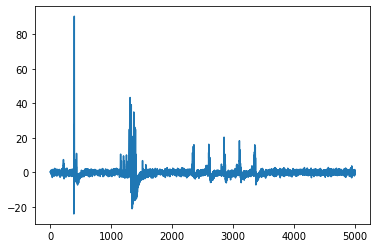

highest three points
[1328 1309  392]
[39.19945793 43.3533856  90.39636955]
tvla at POI=392: 90.396369545574


In [138]:
#tvla, taking signal to be given by sbox output
#fixed vs random
tvla_sbox("sbox_welch",1,0,0,0,0)

number of traces for dataset one: 50
number of traces for dataset two: 50
sample mean for dataset one at POI=392: -0.042109375
sample mean for dataset two at POI=392: -0.05015625
sample variance for dataset one at POI=392: 2.5939941406249993e-06
sample variance for dataset two at POI=392: 9.87773038903061e-06


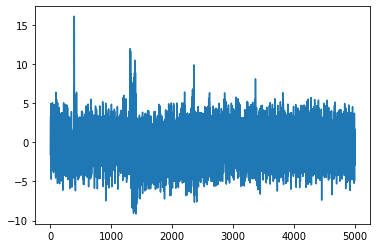

highest three points
[1317 1309  392]
[11.64871499 11.96465383 16.11198327]
tvla at POI=392: 16.111983273134253


In [139]:
#tvla, taking signal to be given by sbox output
#fixed vs random, less traces
tvla_sbox("sbox_welch",1,0,0,50,50)

## SNR computation

We take the dataset with random plaintexts and random round keys  

In [36]:
#Loading file_no traces to the variable traces and the corresponding plaintexts to the variable plaintexts
file_no_rk = 10000
traces_rk = []
plaintexts_rk = []
keys = []

for i in range(file_no_rk):
    with open('random_dataset/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_rk.append(lines)

with open('random_dataset/plaintexts.txt') as f:
    plaintexts_rk = f.read().splitlines()

with open('random_dataset/keys.txt') as f:
    keys_rk = f.read().splitlines()

trace_array_rk = np.array(traces_rk)
trace_array_rk = trace_array_rk.astype(float)

#number of time samples in one trace
N_rk = 5000

In [37]:
#when the signal correspond to the exact value of the 0th Sbox output, we divide the traces to 16 subsets
#when signal correspond to the Hamming weight of the 0th Sbox output, we divide the traces to 5 subsets
#when signal correspond to the 0th bit of the 0th Sbox output, we divide the traces to 2 subsets
sets = [16, 5, 2]

#Function for computing SNR, given time sample t, and the choice of signal:
#0 -- signal correspond to the exact value of the 0th Sbox output
#1 -- signal correspond to the Hamming weight of the 0th Sbox output
#2 -- signal correspond to the 0th bit of the 0th Sbox output

#ifprint = 1, intermedaite values of the computation will be printed
def computeSNR(t, signal_choice, ifprint):
    no_of_sets = sets[signal_choice]
    
    #no_of_sets sets
    A = [[] for y in range(no_of_sets)] 
    
    #for each trace/plaintext
    for j in range(file_no_rk):
        
        pt = int(plaintexts_rk[j][15],16)#extract the 0th nibble of the plaintext
        ky = int(keys_rk[j][15],16)#extract the 0th nibble of the first round key
        
        v = S[ky^pt]#compute the output of the 0th Sbox for this plaintext
        
        if signal_choice == 1:
            v = HW[v]
        if signal_choice == 2:
            v = v%2
        
        A[v].append(trace_array_rk[j][t])#group the leakage at time t according to this output
    
    #compute the averages for leakages in each set
    avg = []
    for v in range(no_of_sets):
        avg.append(statistics.mean(A[v]))
        if ifprint:
            print("average of A[" + str(v) + "] is %s" %(statistics.mean(A[v])))
    
    #variance of signal is given by the variance of leakage avgs
    varX = np.var(avg)
    
    #take leakage minus mean
    LminusAvg = []
    for v in range(no_of_sets):
        for j in range(len(A[v])):
            LminusAvg.append(A[v][j]-avg[v])
    #variance of noise is given by variance of leakage minus mean
    varN = np.var(LminusAvg)
    
    #SNR is given by variance of signal divided by variance of noise
    snr = varX/varN
    
    if ifprint:
        print("\nVariance of the signal is % s " %(varX))
        print("Variance of the noise is % s " %(varN))
        print("SNR is % s " %(snr))
    return varX, varN, snr

In [38]:
#compute SNR for one time sample t=600, with identity leakage model
computeSNR(600,0,1)

average of A[0] is 0.0821159675670347
average of A[1] is 0.0822140625
average of A[2] is 0.08209151255933544
average of A[3] is 0.08203714177978884
average of A[4] is 0.08200042825996677
average of A[5] is 0.08226982390065146
average of A[6] is 0.0821085096914557
average of A[7] is 0.08206010643468119
average of A[8] is 0.08193392366976351
average of A[9] is 0.08226664291530944
average of A[10] is 0.08200958300316957
average of A[11] is 0.08227062055950267
average of A[12] is 0.08215835813492063
average of A[13] is 0.0821360518292683
average of A[14] is 0.08202384057283764
average of A[15] is 0.08205525153609831

Variance of the signal is 1.0088265085721795e-08 
Variance of the noise is 6.418443277076604e-06 
SNR is 0.0015717619756416507 


(1.0088265085721795e-08, 6.418443277076604e-06, 0.0015717619756416507)

### SNR when signal correspond to the exact value of the 0th Sbox output

In [39]:
# compute SNR for all time samples
varX = [0 for i in range(N_rk)]
varN = [0 for i in range(N_rk)]
SNR = [0 for i in range(N_rk)]
for i in range(N_rk):
    varX[i], varN[i],SNR[i]=computeSNR(i,0,0)

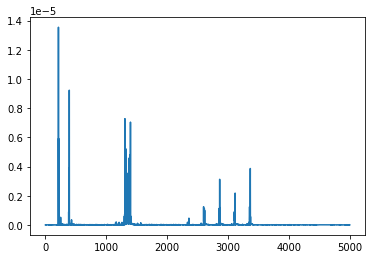

In [40]:
#plot of variance of signal
plt.plot(varX)

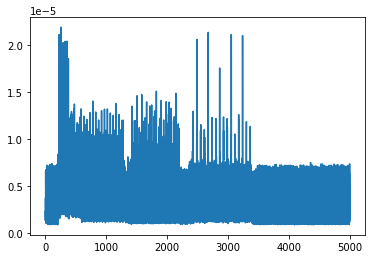

In [41]:
#plot of variance of noise
plt.plot(varN)

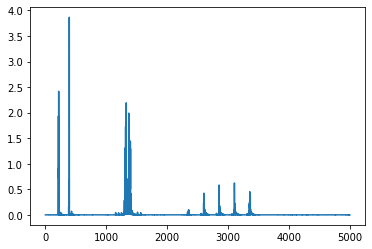

In [42]:
#plot of SNR
plt.plot(SNR)

In [43]:
#save the data to files
savetofile("SNR/varX",varX)
savetofile("SNR/varN",varN)
savetofile("SNR/SNR",SNR)

#### POIs -- Identity leakage model

In [44]:
#three POIs
highest_tree_points(SNR)

[1328  218  392]
[2.19185564 2.41795274 3.86612618]


In [45]:
#three highest points in signal variance
highest_tree_points(varX)

[1306  214  392]
[7.28205805e-06 1.35473479e-05 9.23285508e-06]


### SNR when signal correspond to the Hamming weight of the 0th Sbox output

In [46]:
#compute SNR for one time sample t=600, with identity leakage model
computeSNR(600,1,1)

average of A[0] is 0.0821159675670347
average of A[1] is 0.08206232787637699
average of A[2] is 0.08213964224365751
average of A[3] is 0.08211709299395162
average of A[4] is 0.08205525153609831

Variance of the signal is 1.1042735960885632e-09 
Variance of the noise is 6.4271519636094245e-06 
SNR is 0.00017181383019119003 


(1.1042735960885632e-09, 6.4271519636094245e-06, 0.00017181383019119003)

In [47]:
# compute SNR for all time samples
varX_hw = [0 for i in range(N_rk)]
varN_hw = [0 for i in range(N_rk)]
SNR_hw = [0 for i in range(N_rk)]
for i in range(N_rk):
    varX_hw[i], varN_hw[i],SNR_hw[i]=computeSNR(i,1,0)

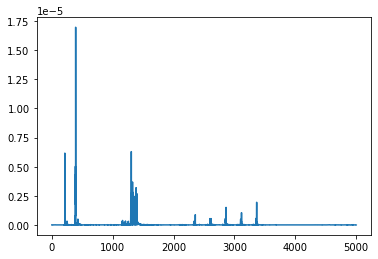

In [48]:
#plot of variance of signal
plt.plot(varX_hw)

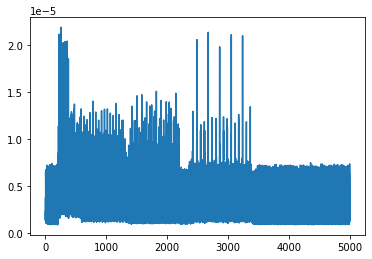

In [49]:
#plot of variance of noise
plt.plot(varN_hw)

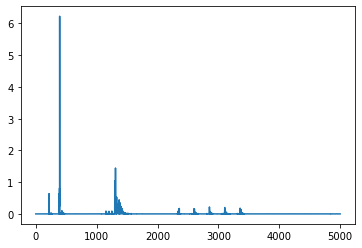

In [50]:
#plot of SNR
plt.plot(SNR_hw)

In [51]:
#save the data to files
savetofile("SNR/varX_hw",varX_hw)
savetofile("SNR/varN_hw",varN_hw)
savetofile("SNR/SNR_hw",SNR_hw)

#### POIs -- Hamming weight leakage model

In [52]:
#three POIs
highest_tree_points(SNR_hw)

[1304  392 1309]
[1.05050164 6.22741491 1.44578768]


### SNR when signal correspond to 0th bit of the 0th Sbox output

In [53]:
#compute SNR for one time sample t=600, with identity leakage model
computeSNR(600,2,1)

average of A[0] is 0.08205638498852753
average of A[1] is 0.08216007480453087

Variance of the signal is 2.6878944857015417e-09 
Variance of the noise is 6.425559868417835e-06 
SNR is 0.0004183128849071609 


(2.6878944857015417e-09, 6.425559868417835e-06, 0.0004183128849071609)

In [54]:
# compute SNR for all time samples
varX_bit = [0 for i in range(N_rk)]
varN_bit = [0 for i in range(N_rk)]
SNR_bit = [0 for i in range(N_rk)]
for i in range(N_rk):
    varX_bit[i], varN_bit[i],SNR_bit[i]=computeSNR(i,2,0)

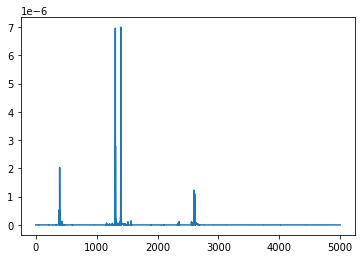

In [55]:
#plot of variance of signal
plt.plot(varX_bit)

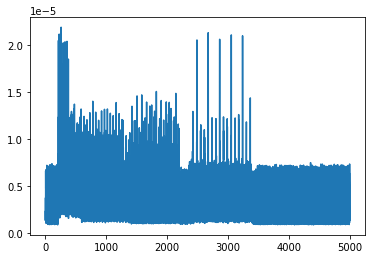

In [56]:
#plot of variance of noise
plt.plot(varN_bit)

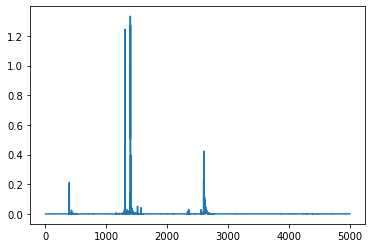

In [57]:
#plot of SNR
plt.plot(SNR_bit)

In [58]:
#save the data to files
savetofile("SNR/varX_bit",varX_bit)
savetofile("SNR/varN_bit",varN_bit)
savetofile("SNR/SNR_bit",SNR_bit)

#### POIs -- 0th bit of 0th Sbox output

In [59]:
#three POIs
highest_tree_points(SNR_bit)

[1310 1397 1395]
[1.24557514 1.27169621 1.33331687]


In [116]:
a= [1,2,3]
statistics.variance(a)

1